In [7]:
from neurodiffeq import diff
from neurodiffeq.solvers import Solver1D, Solver2D
from neurodiffeq.conditions import IVP, DirichletBVP2D
from neurodiffeq.networks import FCNN, SinActv
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from neurodiffeq.monitors import Monitor1D
%matplotlib notebook
import IPython
# %matplotlib notebook

In [8]:
def ode_system(u, v, t): 
    return [diff(u,t)-(u-u*v), diff(v,t)-(u*v-v)]

conditions = [IVP(t_0=0.0, u_0=1.5), IVP(t_0=0.0, u_0=1.0)]
nets = [FCNN(actv=SinActv), FCNN(actv=SinActv)]
monitor = Monitor1D(t_min=0.1, t_max=12.0, check_every=100)
# g1 = Generator1D(size=64,  t_min=0.1, t_max=12.0, method='uniform')

solver = Solver1D(ode_system, conditions, t_min=0.1, t_max=12.0, nets=nets)
solver.fit(max_epochs=300, callbacks = [monitor.to_callback()])
solution = solver.get_solution()

<IPython.core.display.Javascript object>

Training Progress:   0%|                                                                 | 0/300 [00:00<?, ?it…

In [44]:
t = np.linspace(0.1, 12.0, 100)
u, v = solution(t, to_numpy=True)  # t can be np.ndarray or torch.Tensor

In [46]:
def func(t,x):
    y = np.zeros(len(x))
    y[0] = x[0]- x[0]*x[1]
    y[1] = x[0]*x[1] - x[1]
    return y

In [57]:
x0 = np.array([1.5,1.0])
y_out = solve_ivp(func, t_span = [0.1,12.0], y0 = x0, method='RK45', t_eval=t)

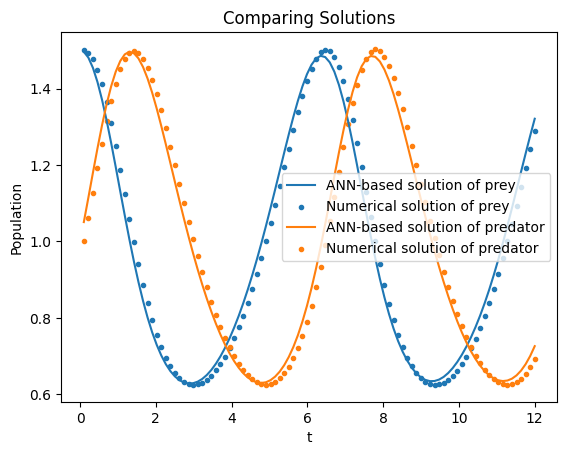

In [58]:
plt.title("Comparing Solutions")
plt.ylabel('Population')
plt.xlabel('t')
plt.plot(t, u, label='ANN-based solution of prey')
plt.scatter(y_out.t,y_out.y[0],label='Numerical solution of prey',marker=".")
plt.plot(t, v, label='ANN-based solution of predator')
plt.scatter(y_out.t,y_out.y[1],label='Numerical solution of predator',marker=".")
plt.legend()
plt.show()

8.14.0
